<a href="https://colab.research.google.com/github/Jbragantino/Agentes-Reativos/blob/main/Agentes_Reativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [302]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Função que exibe o ambiente na tela
def exibir(matriz):
    global posX
    global posY
    
    # Altera o esquema de cores do ambiente
    plt.imshow(matriz, 'gray')
    plt.nipy_spectral() 
    
    # Coloca o agente no ambiente 
    plt.plot([posX],[posY], marker='o', color='r', ms=20, ls='')
    
    plt.show(block=False)
    
    # Pausa a execução do código por 0.5 segundos para facilitar a visualização
    plt.pause(0.5)    
    plt.clf()

In [303]:
from enum import Enum

class Direcao(Enum):
  CIMA = 1
  BAIXO = 2
  DIREITA = 3
  ESQUERDA = 4
  LIMPAR = 5
  MOSCAR = 6

In [304]:
#Caminho da matriz
caminho = np.array([[Direcao.MOSCAR,  Direcao.MOSCAR,  Direcao.MOSCAR,   Direcao.MOSCAR,   Direcao.MOSCAR,   Direcao.MOSCAR],
                    [Direcao.MOSCAR,  Direcao.BAIXO,   Direcao.ESQUERDA, Direcao.BAIXO,    Direcao.ESQUERDA, Direcao.MOSCAR],
                    [Direcao.MOSCAR,  Direcao.BAIXO,   Direcao.CIMA,     Direcao.ESQUERDA, Direcao.CIMA,     Direcao.MOSCAR],
                    [Direcao.MOSCAR,  Direcao.BAIXO,   Direcao.DIREITA,  Direcao.BAIXO,    Direcao.CIMA,     Direcao.MOSCAR],
                    [Direcao.MOSCAR,  Direcao.DIREITA, Direcao.CIMA,     Direcao.DIREITA,  Direcao.CIMA,     Direcao.MOSCAR],
                    [Direcao.MOSCAR,  Direcao.MOSCAR,  Direcao.MOSCAR,   Direcao.MOSCAR,   Direcao.MOSCAR,   Direcao.MOSCAR]])


In [305]:
def add_suj(sujY, sujX):
  global suj_total
  if matriz[sujY][sujX] != 0 or (sujY == posY and sujX == posX):
    return
  else:
    matriz[sujY][sujX] = 2
    suj_total += 1

In [306]:
def andar(acao):
  global posX, posY
  global suj_total
  if acao == Direcao.CIMA:
    posY -= 1
    return
  elif acao == Direcao.BAIXO:
    posY += 1
    return
  elif acao == Direcao.DIREITA:
    posX += 1
    return
  elif acao == Direcao.ESQUERDA:
    posX -= 1
    return
  elif acao == Direcao.LIMPAR:
    matriz[posY][posX] = 0
    suj_total -= 1
    return
  elif acao == Direcao.MOSCAR:
    return

In [307]:
def caminho_simples():
  global posX, posY
  global caminho
  global suj_total
  
  while suj_total > 0:

    if(matriz[posY][posX] == 2):
      acao = Direcao.LIMPAR
    else:
      acao = caminho[posY][posX]

    andar(acao)

    exibir(matriz)

In [385]:
def procura_sujeira(posX, posY):

  #iniciar as variáveis
  sujX, sujY = 0, 0
  dist = 1000

  for count in range(len(matriz)):
    for i in range(1, count):
      for j in range(1, count):
        if matriz[i][j] == 2:
          dist_temp = abs(j-posX) + abs(i-posY)
          if dist_temp < dist:
            sujY, sujX = i, j
            dist = abs(sujX-posX) + abs(sujY-posY)
  
  return sujX, sujY

In [309]:
def reativo_objetivo():
  global posX, posY
  global suj_total

  ptos = 0

  acao = Direcao.MOSCAR

  while suj_total > 0:

    sujX, sujY = procura_sujeira(posX, posY)

    if matriz[posY][posX] == 2:
      acao = Direcao.LIMPAR
      andar(acao)
    elif posX < sujX:
      acao = Direcao.DIREITA
      andar(acao)
    elif posX > sujX:
      acao = Direcao.ESQUERDA
      andar(acao)
    elif posY < sujY:
      acao = Direcao.BAIXO
      andar(acao)
    elif posY > sujY:
      acao = Direcao.CIMA
      andar(acao)

    ptos += 1
    exibir(matriz)

  print("Pontos = ",ptos)

In [310]:
from random import randint as rn

matriz = np.array([ [1, 1, 1, 1, 1, 1],
                    [1, 0, 0, 2, 0, 1],
                    [1, 0, 0, 0, 0, 1],
                    [1, 0, 0, 0, 0, 1],
                    [1, 0, 2, 0, 0, 1],
                    [1, 1, 1, 1, 1, 1]])
suj_total = 2

Agente Reativo Simples


In [ ]:
posX, posY = rn(1,4), rn(1,4)

while suj_total < 3:
  add_suj(rn(1,4),rn(1,4))

exibir(matriz)
caminho_simples()

Agente Reativo Objetivo

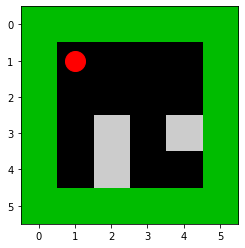

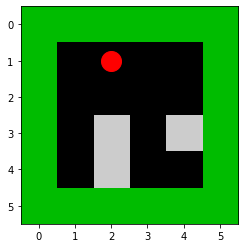

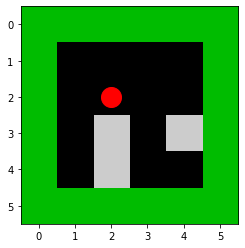

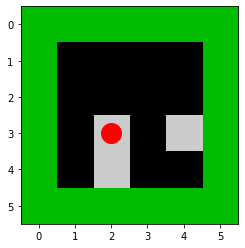

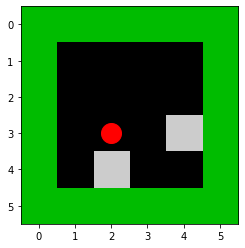

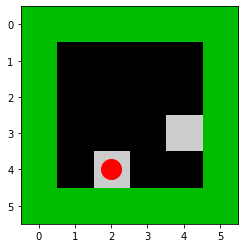

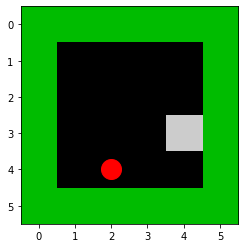

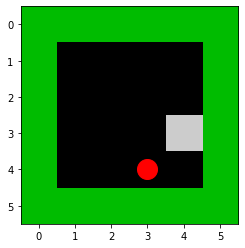

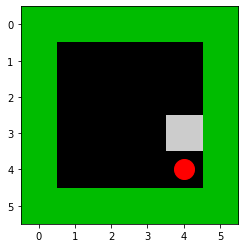

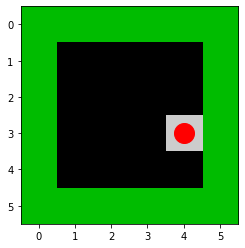

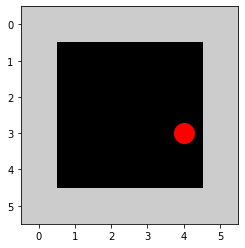

Pontos =  10


<Figure size 432x288 with 0 Axes>

In [387]:
from random import randint as rn

matriz = np.array([ [1, 1, 1, 1, 1, 1],
                    [1, 0, 0, 0, 0, 1],
                    [1, 0, 0, 0, 0, 1],
                    [1, 0, 0, 0, 0, 1],
                    [1, 0, 0, 0, 0, 1],
                    [1, 1, 1, 1, 1, 1]])
suj_total = 0

posX, posY = 1, 1

while suj_total < 3:
  add_suj(rn(1,4),rn(1,4))

exibir(matriz)
reativo_objetivo()